# Лабораторная работа №2
### Статистический и спектральный анализ. Применение статистических критериев и тестов
## РИ-681223 Черепанов Александр
### Вариант №19

In [57]:
# 1. Импортируем нужные библиотеки и функции
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import scipy.stats as stats

from scipy import signal

from statsmodels.tsa import api as tsa
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

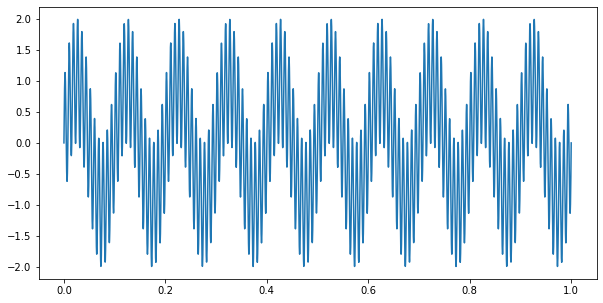

In [58]:
# 2. Строим периодический сигнал:
t = np.linspace(0, 1, 4096)
x1 = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*120*t)
plt.figure(figsize = (10, 5))
plt.plot(t, x1);

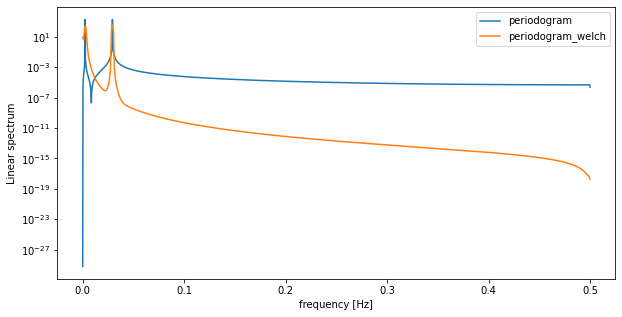

In [59]:
# 3. Оцениваем периодограмму и оценку спектральной плотности мощности ряда с помощью метода Велша:
pd1, pdden1 = signal.periodogram(x1)
pdw1, pddenw1 = signal.welch(x1, nperseg = 1024)

plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1, label='periodogram')
plt.semilogy(pdw1, pddenw1, label='periodogram_welch')
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum')
plt.legend();

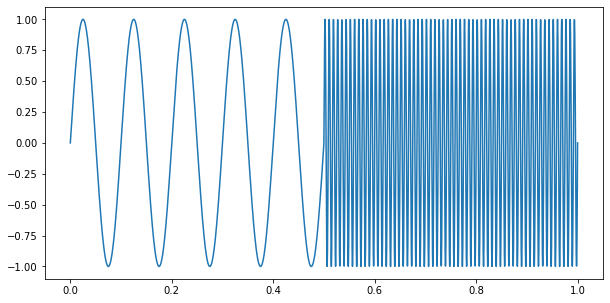

In [60]:
# 4. Сгенерируем периодический сигнал с изломом частоты:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
for i in range(0, len(t)//2):
  x2[i] = np.sin(2*np.pi*10*t[i])
for i in range(len(t)//2, len(t)):
  x2[i] = np.sin(2*np.pi*120*t[i])
  
plt.figure(figsize = (10, 5))
plt.plot(t, x2);

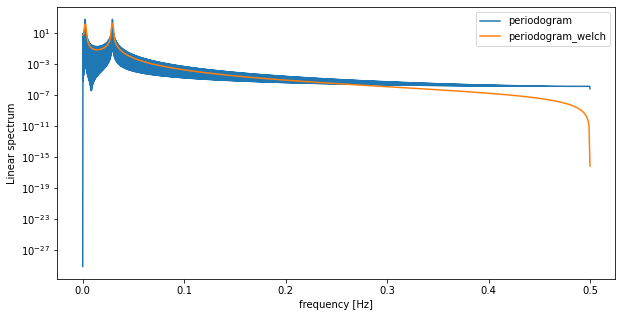

In [61]:
# 5. Сделаем оценку спектров сигнала:
pd2, pdden2 = signal.periodogram(x2)
pdw2, pddenw2 = signal.welch(x2, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd2, pdden2, label='periodogram')
plt.semilogy(pdw2, pddenw2, label='periodogram_welch')
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum')
plt.legend();

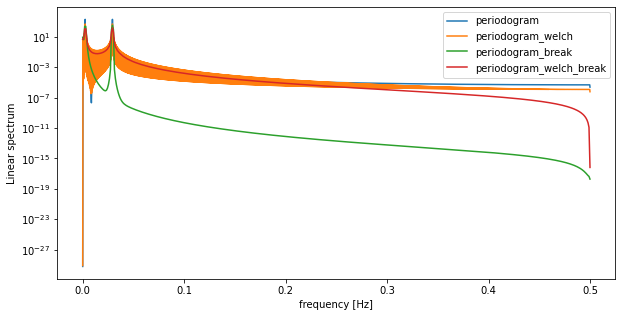

In [62]:
# 6. Строим оценки спектров сигнала для обычного периодического сигнала и для периодического сигнала с изломом частоты.
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1, label='periodogram')
plt.semilogy(pd2, pdden2, label='periodogram_welch')

plt.semilogy(pdw1, pddenw1, label='periodogram_break')
plt.semilogy(pdw2, pddenw2, label='periodogram_welch_break')

plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum')
plt.legend();

In [63]:
# 7. Видно, что форма этих оценок близка друг к другу. Это связано с тем,
# что данные спектральные оценки усредняют периоды по времени,
# теряя зависимость частоты от времени, если она существовала.

In [64]:
# 8. Проведем расчет частоты дискретизации:
fs = 1/(t[1]-t[0])

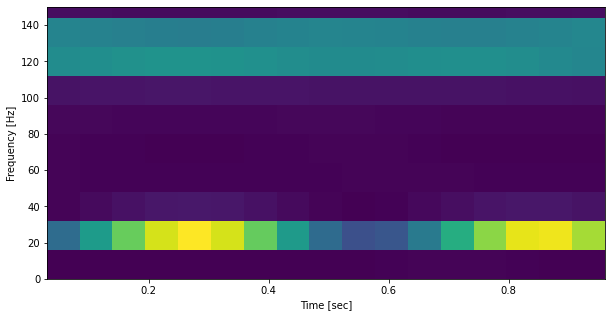

In [65]:
# 9. Строим спектрограмму для суммы двух периодик:
f, tx, Sxx= signal.spectrogram(x1, fs) # возвращаем частоту от времени
plt.figure(figsize= (10, 5))
plt.pcolormesh(tx, f, Sxx) # цвет – интенсивность спектрограммы
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

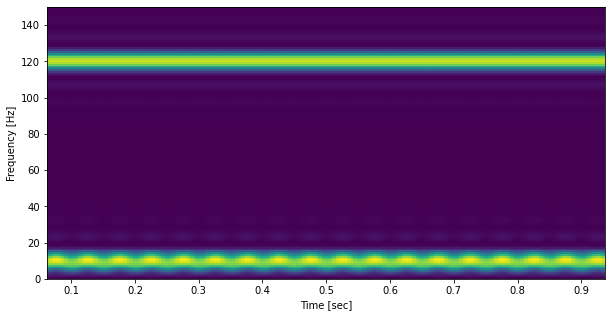

In [66]:
# 10. Изменяем параметры сегментов спектрограммы для более ярко-выраженного результата,
# теперь длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496,
# длина FFT= 4096:
f, tx, Sxx= signal.spectrogram(x1, fs, nperseg= 512, noverlap= 496, nfft=4096)
plt.figure(figsize= (10, 5))
plt.pcolormesh(tx, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

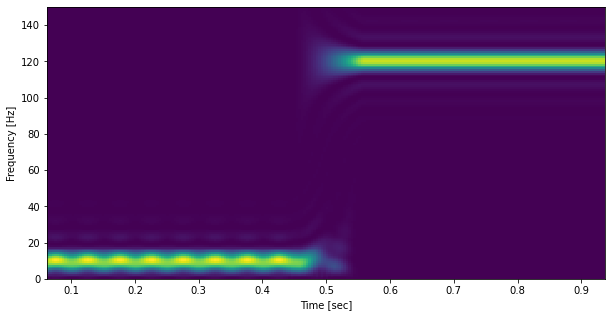

In [67]:
# 11. Теперь  аналогично строим спектрограмму второго ряда x2, представляющего собой отсчеты сигнала с изломом частоты.
f, tx, Sxx= signal.spectrogram(x2, fs, nperseg= 512, noverlap= 496, nfft=4096)
plt.figure(figsize= (10, 5))
plt.pcolormesh(tx, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

In [68]:
# 12. На второй спектрограмме видно, что имеется зависимость частоты от времени, начиная с 0.5 секунд.
# На первой спектограмме какая-либо зависимость частоты от времени отсутствует.

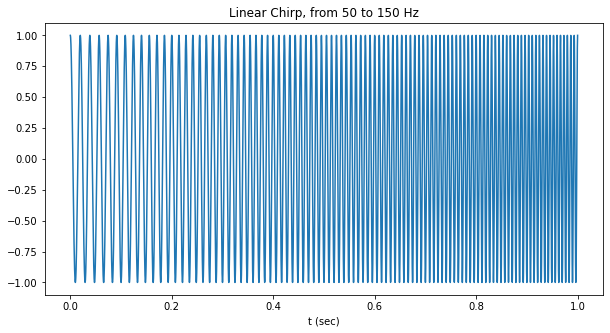

In [69]:
# 13. Далее создадим временной ряд с линейной частотной модуляцией в диапазоне от 50 до 150 Гц:
tx= np.linspace(0, 1, 8192) # временной отрезок от 0 до 1 сек
w = signal.chirp(tx, f0=50, f1=150, t1=1, method='linear') # от 50 до 150 Гц за 1 секунду, ЛЧМ

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Linear Chirp, from 50 to 150 Hz")
plt.xlabel('t (sec)')
plt.show()

In [70]:
# 14. Рассчитаем частоту дискретизации ряда:
fs = 1/(tx[1]-tx[0])

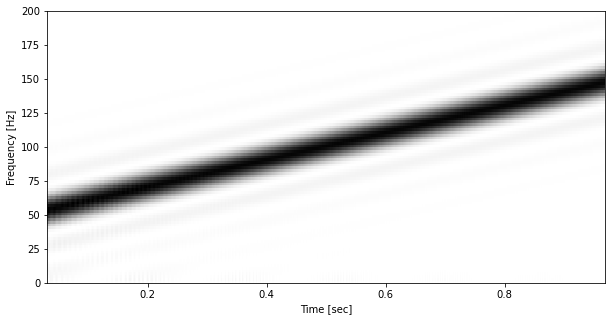

In [71]:
# 15. Построим спектрограмму заданного ряда, чтобы вычислить его частотно-временные характеристики. 
f, tx, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)
# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT= 4096
plt.figure(figsize= (10, 5))
plt.pcolormesh(tx, f, Sxx, cmap='gray_r') # в оттенках серого цвета
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 200)
plt.xlabel('Time [sec]')
plt.show()

In [72]:
# 16. Полученная  черно-белая  картина  спектрограммы хорошоотражает линейную структуру частотной модуляции.

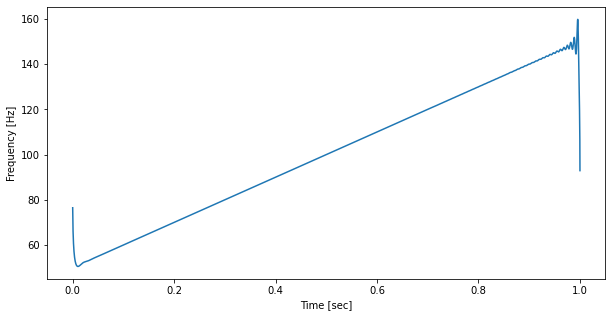

In [73]:
# 17. Для оценки диапазона частотной модуляции выполним Преобразование Гильберта:
analytic_signal = signal.hilbert(w) # аналитический сигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)# мгновенная частота как производная от фазы, приведенная в Гц
tx= np.linspace(0, 1, 8192) # временной отрезок от 0 до 1 сек

plt.figure(figsize= (10, 5))
# из-за численного расчета производной массив мгновенной частоты будет меньше массива времени на одну точку:
plt.plot(tx[1:], instantaneous_frequency)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [74]:
# 18. Полученный график имеет четко выраженную линейную форму частоты от 50 до 150 Гц

In [75]:
# 19. Построим зависимость частоты от времени для следующих модельных временных рядов
# через спектрограмму и преобразование Гильберта:
def make_spectrogram(w, tx, nperseg = 512, noverlap = 496, nfft=4096, figsize=(10, 5)):
  fs = 1/(tx[1]-tx[0])
  f, tx, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)

  plt.figure(figsize= figsize)
  plt.pcolormesh(tx, f, Sxx, cmap='gray_r') # в оттенках серого цвета
  plt.title('Spectrogram')
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.show()
    
def make_hilbert(w, tx, figsize=(10, 5)):
  fs = 1/(tx[1]-tx[0])
  analytic_signal = signal.hilbert(w) # аналитический сигнал
  instantaneous_phase = np.unwrap(np.angle(analytic_signal))# мгновенная фаза в развернутом непрерывном виде
  instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)# мгновенная частота как производная от фазы, приведенная в Гц

  plt.figure(figsize=figsize)
  # из-за численного расчета производной массив мгновенной частоты будет меньше массива времени на одну точку:
  plt.plot(tx[1:], instantaneous_frequency)
  plt.title('Hilbert transform')
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.show()    

19. Для ЛЧМ в большем диапазоне:

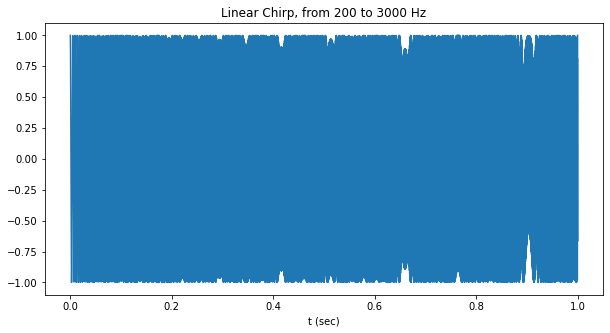

In [76]:
tx= np.linspace(0, 1, 8192) # ЛЧМ в большем диапазоне
w = signal.chirp(tx, f0=200, f1=3000, t1=1, method='linear')

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Linear Chirp, from 200 to 3000 Hz")
plt.xlabel('t (sec)')
plt.show()

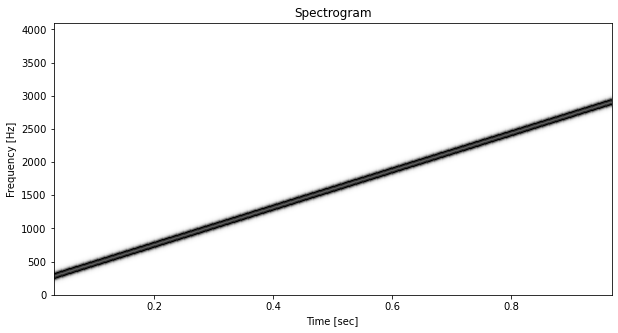

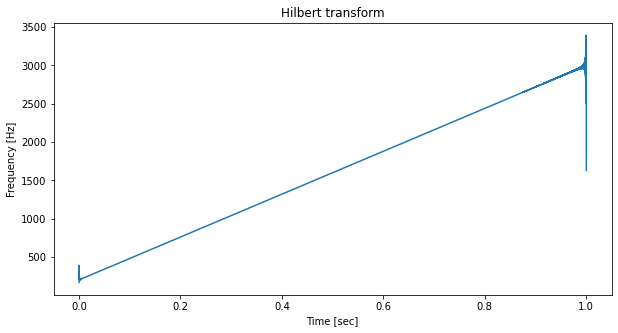

In [77]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

20. Ряд с квадратичной частотной модуляцией:

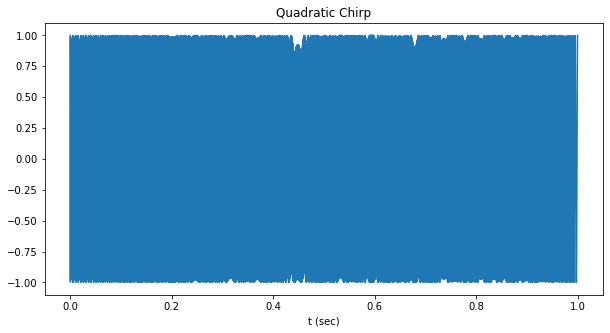

In [78]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=2000, f1=200, t1=1, method='quadratic')

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Quadratic Chirp")
plt.xlabel('t (sec)')
plt.show()

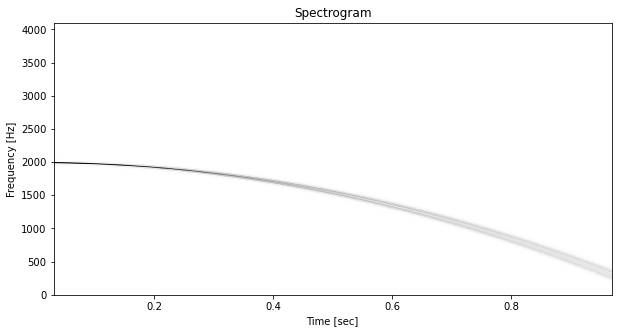

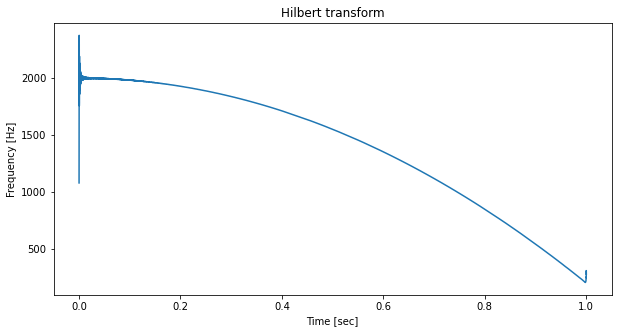

In [79]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

21. Ряд с инверсной квадратичной частотной модуляцией:

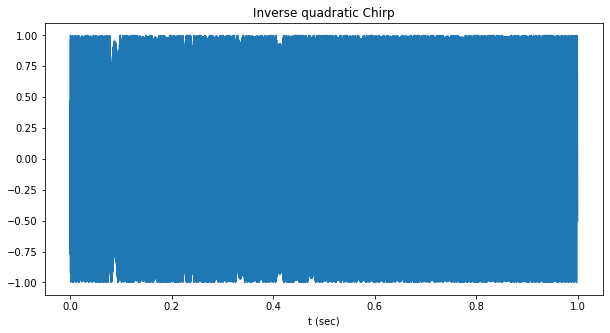

In [80]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=3200, f1=400, t1=1, method='quadratic', vertex_zero=False)

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Inverse quadratic Chirp")
plt.xlabel('t (sec)')
plt.show()

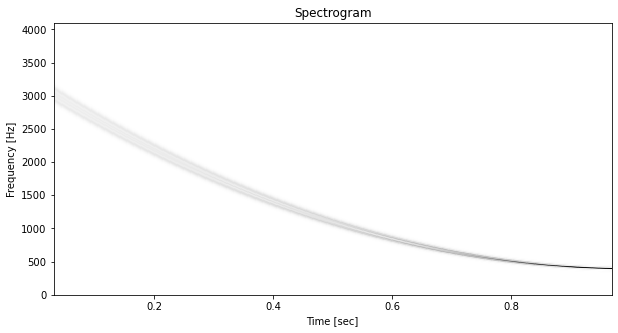

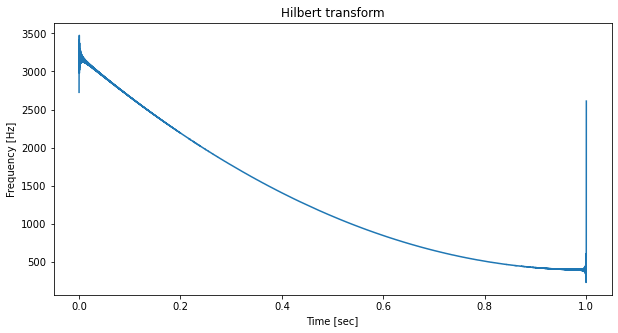

In [81]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

22. Ряд с логарифмической частотной модуляцией: 

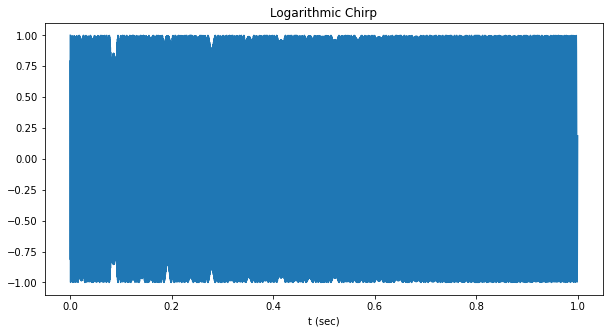

In [82]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=2450, f1=300, t1=1, method='logarithmic')

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Logarithmic Chirp")
plt.xlabel('t (sec)')
plt.show()

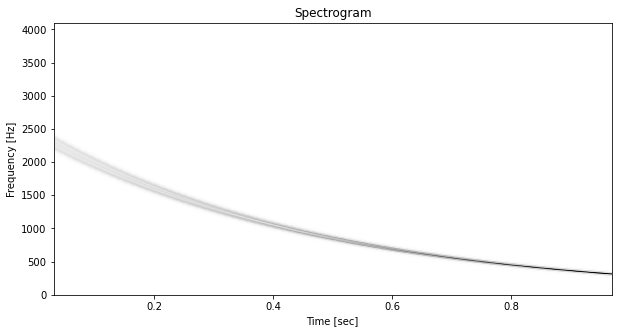

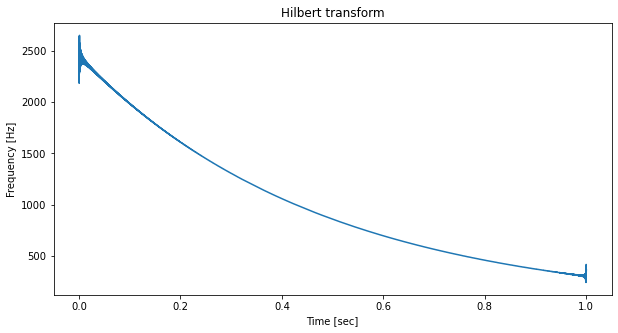

In [83]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

23. Ряд с гиперболической частотной модуляцией:

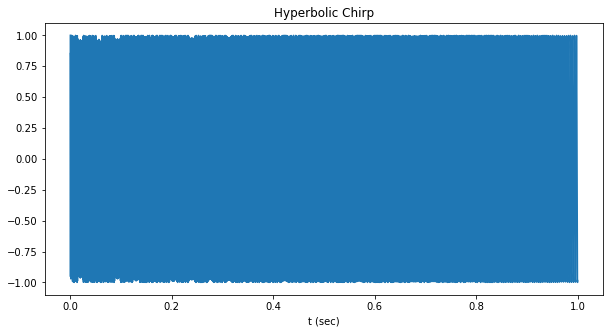

In [84]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=1500, f1=250, t1=1, method='hyperbolic')

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Hyperbolic Chirp")
plt.xlabel('t (sec)')
plt.show()

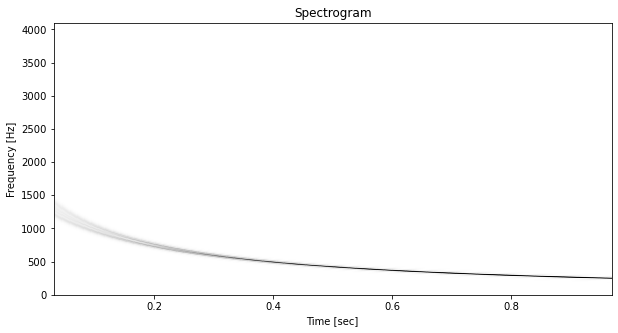

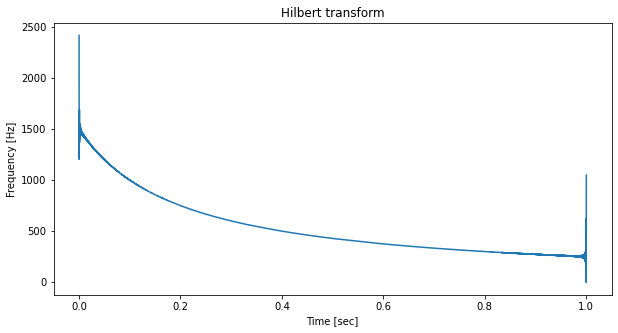

In [85]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

24. Ряд с полиномиальной частотной модуляцией:

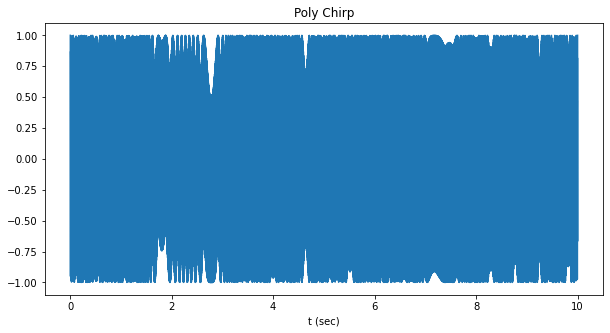

In [86]:
tx = np.linspace(0, 10, 8192)
p = np.poly1d([2.5, -36.0, 125.0, 150.0])
w = signal.sweep_poly(tx, p)

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Poly Chirp")
plt.xlabel('t (sec)')
plt.show()

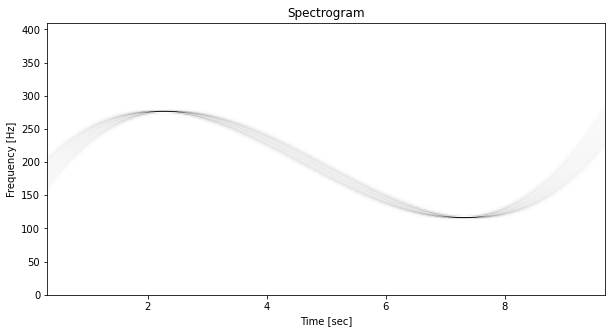

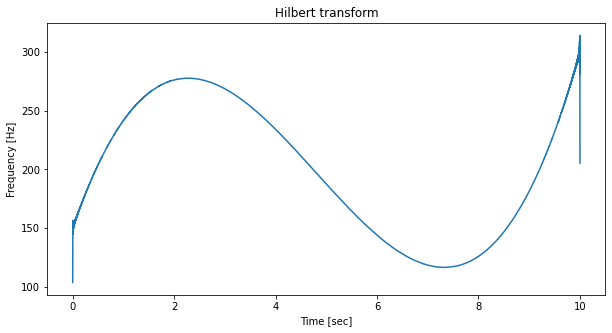

In [87]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

25. Ряд с частотной модуляцией другим гармоническим сигналом:

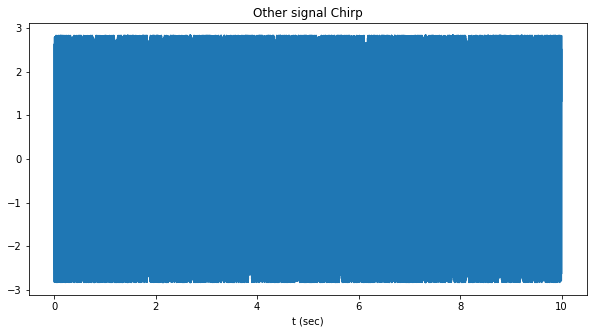

In [88]:
tx = np.linspace(0, 10, 2*8192)
mod = 500*np.cos(2*np.pi*0.25*tx)
w = 2 * np.sqrt(2) * np.sin(2*np.pi*300*tx + mod)

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("Other signal Chirp")
plt.xlabel('t (sec)')
plt.show()

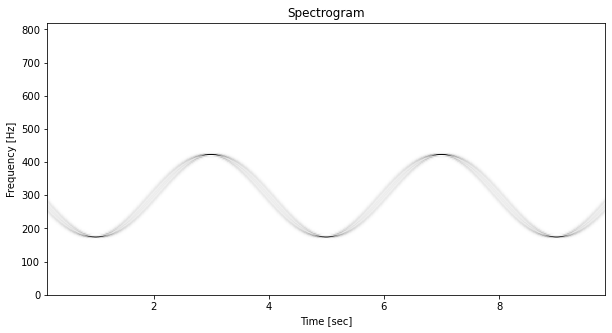

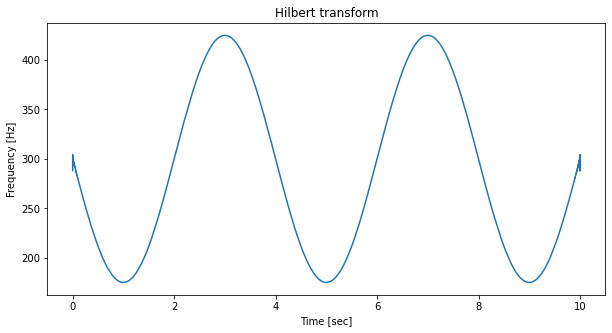

In [89]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

26. Временной  рядиз 4 периодик без  шума:

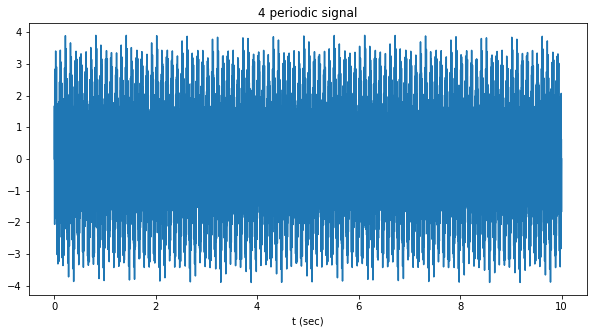

In [90]:
tx = np.linspace(0, 10, 2*8192)
w = np.sin(2*np.pi*10*tx) + np.sin(2*np.pi*120*tx) + np.sin(2*np.pi*500*tx) + np.sin(2*np.pi*1200*tx)

plt.figure(figsize= (10, 5))
plt.plot(tx, w)
plt.title("4 periodic signal")
plt.xlabel('t (sec)')
plt.show()

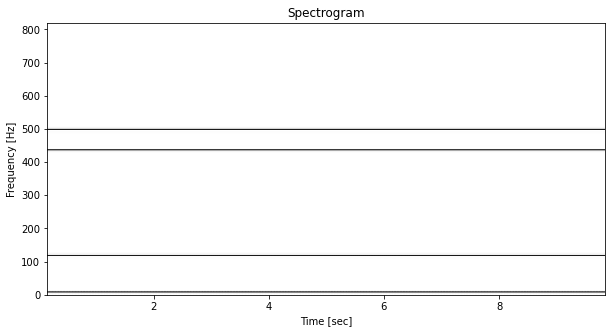

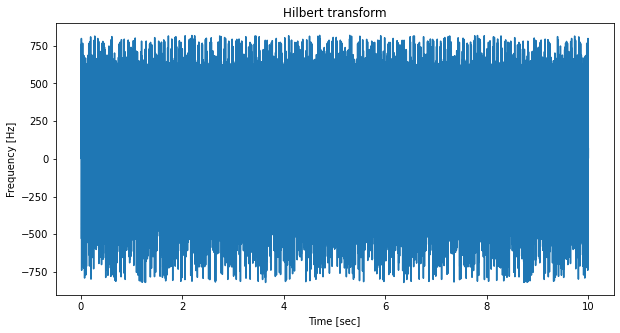

In [91]:
make_spectrogram(w, tx)
make_hilbert(w, tx)

28. Проверка статистических гипотез

29. Создаем временной ряд, как частную выборку из нормального распределения:

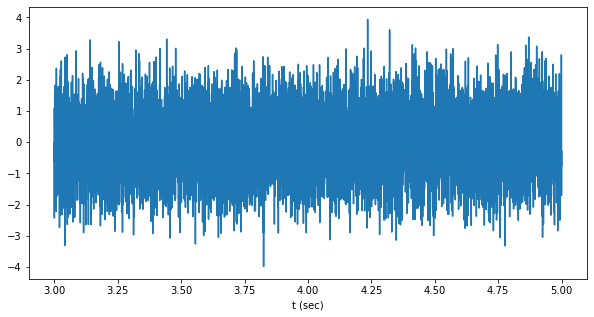

In [92]:
x = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)
plt.figure(figsize = (10, 5))
plt.plot(t, x)
plt.xlabel('t (sec)')
plt.show()

30. Произведем оценку  ВР  на стационарность, используя KPSS-тест. В качестве нулевой гипотизы соответственно рассматирвам стационарность данного ряда.

In [93]:
kpss_stat, p_value, lags, crit = tsa.kpss(x)
print(f" Статистика KPSS теста: {kpss_stat}\n p-value: {p_value}")

 Статистика KPSS теста: 0.037411508947985055
 p-value: 0.1


Анализируя статистику KPSS теста (близко к 0), и p значение (больше 0.05) с достаточной долей уверенности нулевая гипотиза не отвергается. Ряд является стационарным.

34. Внесем явную нестационарность в этот ряд:

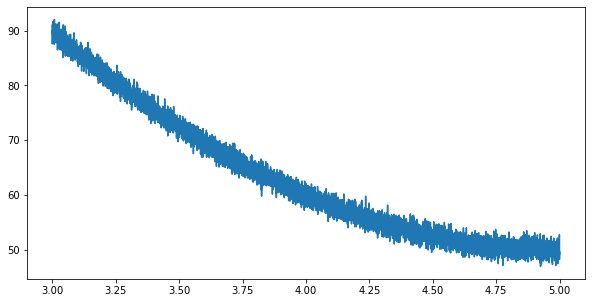

In [94]:
xv=x+(10*t**2-100*t+300)
plt.figure(figsize = (10, 5))
plt.plot(t, xv)
plt.show()

35. Так же применяем KPSS тест:

In [95]:
kpss_stat, p_value, lags, crit = tsa.kpss(xv)
print(f" Статистика KPSS теста: {kpss_stat}\n p-value: {p_value}")

 Статистика KPSS теста: 24.522592258738594
 p-value: 0.01


В данном случае нулевая гипотиза отвергается с достаточной уверенностью. Данный ряд не явлется стационарным (статистика сильно больше 0, а p значение меньше 0.05).

36. Проверем с помощью однофакторного дисперсионного анализа две половинки(по времени) исходного временного рядана соответствие дисперсий, чтобы убедиться, что это частные выборки  одной  и  той  же  случайной  величины:

In [96]:
F, p_value = stats.f_oneway(x[:5000], x[5000:])
print(f" F статистика теста: {F}\n p-value: {p_value}")

 F статистика теста: 0.22719317883779516
 p-value: 0.6336233163883593


Значение p-value говорит о том, что нет достаточных оснований полагать, что данные выборки отностятся к разным случайным величинам. Нулевая гипотиза о равенстве дисперсий не отвергается.

Проведем однофакторный дисперсионный анализ для модифицированноговременного ряда:

In [97]:
F, p_value = stats.f_oneway(xv[:5000], xv[5000:])
print(f" F статистика теста: {F}\n p-value: {p_value}")

 F статистика теста: 23213.445787650784
 p-value: 0.0


В данном случае p значение меньше 0.5, поэтому нулевая гипотиза о равенстве дисперсий отвергается.

37. Проверем с помощью  критерия Стьюдента две половинки исходного  временного  ряда на соответствие мат. ожиданий при предположении о равных дисперсиях:

In [98]:
T, p_value = stats.ttest_ind(x[:5000], x[5000:])
print(f" T статистика теста: {T}\n p-value: {p_value}")

 T статистика теста: 0.4766478562186085
 p-value: 0.6336233163891978


Для исходного времееного ряда показтель p значения сильно больше 0.5, нулевая гипотиза о равенстве мат. ожиданий не отвергается.

Так же проведем T тест для модифицированного временного ряда:

In [99]:
T, p_value = stats.ttest_ind(xv[:5000], xv[5000:])
print(f" T статистика теста: {T}\n p-value: {p_value}")

 T статистика теста: 152.35959368431912
 p-value: 0.0


В данном случае p значение меньше 0.5, поэтому нулевая гипотиза о равенстве мат. ожиданий отвергается.